In [2596]:
import pandas as pd
import numpy as np
import re
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [2597]:
df = pd.read_csv('combined_output.csv', low_memory=False)

In [2598]:
df.columns

Index(['name', 'id', 'publicationDate', 'isCreditAvailable', 'isNewAuto',
       'isTradeInAuto', 'photoCount', 'section', 'categoryString', 'category',
       'categoryId', 'availability', 'region', 'city', 'lastUpdate', 'status',
       'unitPrice', 'url', 'appliedPaidServices', 'video', 'seller_userId',
       'seller_userTypeId', 'attributes_model', 'attributes_brand',
       'attributes_avgPrice', 'parameters_Город', 'parameters_Поколение',
       'parameters_Кузов', 'parameters_Объем двигателя, л',
       'parameters_Коробка передач', 'parameters_Привод', 'parameters_Руль',
       'parameters_Цвет', 'parameters_Растаможен в Казахстане',
       'parameters_Пробег', 'parameters_Наличие', 'parameters_Двигатель',
       'source_file', 'new', 'add_date-desc', 'price-asc',
       'year.price-desc.asc', 'price-desc'],
      dtype='object')

In [2599]:
df.head()

,name,id,publicationDate,isCreditAvailable,isNewAuto,isTradeInAuto,photoCount,section,categoryString,category,...,parameters_Растаможен в Казахстане,parameters_Пробег,parameters_Наличие,parameters_Двигатель,source_file,new,add_date-desc,price-asc,year.price-desc.asc,price-desc
0,Mercedes-Benz S 500 2008 г.,182258672.0,2025-02-18T23:59:59+05:00,True,False,False,10.0,auto,auto.car,auto,...,Да,NaN,NaN,NaN,cars_add_date-desc_2025-02-18_10-36-47.json,NaN,NaN,NaN,NaN,NaN
1,Mercedes-Benz S 500 2008 г.,182258672.0,2025-02-18T23:59:59+05:00,True,False,False,10.0,auto,auto.car,auto.car,...,Да,NaN,NaN,NaN,cars_add_date-desc_2025-02-18_10-36-47.json,NaN,NaN,NaN,NaN,NaN
2,Chevrolet Spark 2022 г.,180886528.0,2025-02-18T23:59:59+05:00,True,False,False,15.0,auto,auto.car,auto,...,Да,74 564 км,NaN,NaN,cars_add_date-desc_2025-02-18_10-36-47.json,NaN,NaN,NaN,NaN,NaN
3,Chevrolet Spark 2022 г.,180886528.0,2025-02-18T23:59:59+05:00,True,False,False,15.0,auto,auto.car,auto,...,Да,74 564 км,NaN,NaN,cars_add_date-desc_2025-02-18_10-36-47.json,NaN,NaN,NaN,NaN,NaN
4,Chevrolet Spark 2022 г.,180886528.0,2025-02-18T23:59:59+05:00,True,False,False,15.0,auto,auto.car,auto,...,Да,74 564 км,NaN,NaN,cars_add_date-desc_2025-02-18_10-36-47.json,NaN,NaN,NaN,NaN,NaN


In [2600]:
cols = df.columns

In [2601]:
for i in cols:
    print('\'' + i + '\'')

'name'
'id'
'publicationDate'
'isCreditAvailable'
'isNewAuto'
'isTradeInAuto'
'photoCount'
'section'
'categoryString'
'category'
'categoryId'
'availability'
'region'
'city'
'lastUpdate'
'status'
'unitPrice'
'url'
'appliedPaidServices'
'video'
'seller_userId'
'seller_userTypeId'
'attributes_model'
'attributes_brand'
'attributes_avgPrice'
'parameters_Город'
'parameters_Поколение'
'parameters_Кузов'
'parameters_Объем двигателя, л'
'parameters_Коробка передач'
'parameters_Привод'
'parameters_Руль'
'parameters_Цвет'
'parameters_Растаможен в Казахстане'
'parameters_Пробег'
'parameters_Наличие'
'parameters_Двигатель'
'source_file'
'new'
'add_date-desc'
'price-asc'
'year.price-desc.asc'
'price-desc'


In [2602]:
columns_to_drop = ['publicationDate', 'isTradeInAuto', 'photoCount', 'categoryString','category', 'lastUpdate', 'source_file', 'add_date-desc',
                  'price-asc', 'year.price-desc.asc', 'price-desc', 'seller_userTypeId', 'seller_userId', 'video', 'appliedPaidServices', 'new',  'status',
                  'availability','url', 'section', 'id', 'parameters_Город', 'parameters_Цвет', 'parameters_Наличие', 'parameters_Поколение',
                  'city', 'region', 'categoryId', 'isCreditAvailable', 'attributes_avgPrice']

In [2603]:
df_new = df.drop(columns=columns_to_drop, axis=1).copy()

In [2604]:


print(df_new)

                                 name isNewAuto    unitPrice attributes_model  \
0         Mercedes-Benz S 500 2008 г.     False    8500000.0            S 500   
1         Mercedes-Benz S 500 2008 г.     False    8500000.0            S 500   
2             Chevrolet Spark 2022 г.     False    5050000.0            Spark   
3             Chevrolet Spark 2022 г.     False    5050000.0            Spark   
4             Chevrolet Spark 2022 г.     False    5050000.0            Spark   
...                               ...       ...          ...              ...   
81828  Mercedes-Benz G 63 AMG 2025 г.     False  150000000.0         G 63 AMG   
81829  Mercedes-Benz G 63 AMG 2025 г.     False  150000000.0         G 63 AMG   
81830                 BMW 318 1997 г.     False    2400000.0              318   
81831                 BMW 318 1997 г.     False    2400000.0              318   
81832                             NaN       NaN          NaN              NaN   

      attributes_brand para

In [2605]:
df_new.head()

,name,isNewAuto,unitPrice,attributes_model,attributes_brand,parameters_Кузов,"parameters_Объем двигателя, л",parameters_Коробка передач,parameters_Привод,parameters_Руль,parameters_Растаможен в Казахстане,parameters_Пробег,parameters_Двигатель
0,Mercedes-Benz S 500 2008 г.,False,8500000.0,S 500,Mercedes-Benz,Седан,5.5 (бензин),Автомат,Задний привод,Слева,Да,NaN,NaN
1,Mercedes-Benz S 500 2008 г.,False,8500000.0,S 500,Mercedes-Benz,Седан,5.5 (бензин),Автомат,Задний привод,Слева,Да,NaN,NaN
2,Chevrolet Spark 2022 г.,False,5050000.0,Spark,Chevrolet,Хэтчбек,1.2 (бензин),Автомат,Передний привод,Слева,Да,74 564 км,NaN
3,Chevrolet Spark 2022 г.,False,5050000.0,Spark,Chevrolet,Хэтчбек,1.2 (бензин),Автомат,Передний привод,Слева,Да,74 564 км,NaN
4,Chevrolet Spark 2022 г.,False,5050000.0,Spark,Chevrolet,Хэтчбек,1.2 (бензин),Автомат,Передний привод,Слева,Да,74 564 км,NaN


In [2606]:
df_new.columns

Index(['name', 'isNewAuto', 'unitPrice', 'attributes_model',
       'attributes_brand', 'parameters_Кузов', 'parameters_Объем двигателя, л',
       'parameters_Коробка передач', 'parameters_Привод', 'parameters_Руль',
       'parameters_Растаможен в Казахстане', 'parameters_Пробег',
       'parameters_Двигатель'],
      dtype='object')

In [2607]:
df_new.drop_duplicates(inplace=True)

In [2608]:
df_new

,name,isNewAuto,unitPrice,attributes_model,attributes_brand,parameters_Кузов,"parameters_Объем двигателя, л",parameters_Коробка передач,parameters_Привод,parameters_Руль,parameters_Растаможен в Казахстане,parameters_Пробег,parameters_Двигатель
0,Mercedes-Benz S 500 2008 г.,False,8500000.0,S 500,Mercedes-Benz,Седан,5.5 (бензин),Автомат,Задний привод,Слева,Да,NaN,NaN
2,Chevrolet Spark 2022 г.,False,5050000.0,Spark,Chevrolet,Хэтчбек,1.2 (бензин),Автомат,Передний привод,Слева,Да,74 564 км,NaN
8,Toyota Alphard 2004 г.,False,7300000.0,Alphard,Toyota,Минивэн,2.4 (бензин),Автомат,Передний привод,Слева,Да,230 000 км,NaN
10,BMW 520 1992 г.,False,1450000.0,520,BMW,Седан,2 (бензин),Механика,Задний привод,Слева,Да,NaN,NaN
12,ВАЗ (Lada) Vesta SW Enjoy 2024 г.,True,8790000.0,Vesta SW,ВАЗ (Lada),Универсал,1.8 (бензин),Автомат,Передний привод,Слева,Да,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81762,DongFeng Aeolus Haoji 2024 г.,False,9500000.0,Aeolus Haoji,DongFeng,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81778,ВАЗ (Lada) 2114 2013 г.,False,1520000.0,2114 (хэтчбек),ВАЗ (Lada),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81784,Mitsubishi Outlander 2022 г.,True,5371000.0,Outlander,Mitsubishi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81830,BMW 318 1997 г.,False,2400000.0,318,BMW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2609]:
pattern = r"\b(19|20)\d{2}\b"

In [2610]:
df_new["year"] = pd.to_numeric(df_new["name"].fillna("").str.extract(f"({pattern})")[0], errors="coerce").astype("Int64")
df_new["name"] = df_new["name"].str.replace(r"\s\d{4}\s*г?\.", "", regex=True)
print(df_new)

                            name isNewAuto  unitPrice attributes_model  \
0            Mercedes-Benz S 500     False  8500000.0            S 500   
2                Chevrolet Spark     False  5050000.0            Spark   
8                 Toyota Alphard     False  7300000.0          Alphard   
10                       BMW 520     False  1450000.0              520   
12     ВАЗ (Lada) Vesta SW Enjoy      True  8790000.0         Vesta SW   
...                          ...       ...        ...              ...   
81762      DongFeng Aeolus Haoji     False  9500000.0     Aeolus Haoji   
81778            ВАЗ (Lada) 2114     False  1520000.0   2114 (хэтчбек)   
81784       Mitsubishi Outlander      True  5371000.0        Outlander   
81830                    BMW 318     False  2400000.0              318   
81832                        NaN       NaN        NaN              NaN   

      attributes_brand parameters_Кузов parameters_Объем двигателя, л  \
0        Mercedes-Benz            Седа

In [2611]:
df_new

,name,isNewAuto,unitPrice,attributes_model,attributes_brand,parameters_Кузов,"parameters_Объем двигателя, л",parameters_Коробка передач,parameters_Привод,parameters_Руль,parameters_Растаможен в Казахстане,parameters_Пробег,parameters_Двигатель,year
0,Mercedes-Benz S 500,False,8500000.0,S 500,Mercedes-Benz,Седан,5.5 (бензин),Автомат,Задний привод,Слева,Да,NaN,NaN,2008
2,Chevrolet Spark,False,5050000.0,Spark,Chevrolet,Хэтчбек,1.2 (бензин),Автомат,Передний привод,Слева,Да,74 564 км,NaN,2022
8,Toyota Alphard,False,7300000.0,Alphard,Toyota,Минивэн,2.4 (бензин),Автомат,Передний привод,Слева,Да,230 000 км,NaN,2004
10,BMW 520,False,1450000.0,520,BMW,Седан,2 (бензин),Механика,Задний привод,Слева,Да,NaN,NaN,1992
12,ВАЗ (Lada) Vesta SW Enjoy,True,8790000.0,Vesta SW,ВАЗ (Lada),Универсал,1.8 (бензин),Автомат,Передний привод,Слева,Да,NaN,NaN,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81762,DongFeng Aeolus Haoji,False,9500000.0,Aeolus Haoji,DongFeng,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
81778,ВАЗ (Lada) 2114,False,1520000.0,2114 (хэтчбек),ВАЗ (Lada),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013
81784,Mitsubishi Outlander,True,5371000.0,Outlander,Mitsubishi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
81830,BMW 318,False,2400000.0,318,BMW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997


In [2612]:
df_new['mileage'] = pd.to_numeric(df_new["parameters_Пробег"].str.replace(r"\D+", "", regex=True), errors="coerce").astype("Int64")

In [2613]:
df_new

,name,isNewAuto,unitPrice,attributes_model,attributes_brand,parameters_Кузов,"parameters_Объем двигателя, л",parameters_Коробка передач,parameters_Привод,parameters_Руль,parameters_Растаможен в Казахстане,parameters_Пробег,parameters_Двигатель,year,mileage
0,Mercedes-Benz S 500,False,8500000.0,S 500,Mercedes-Benz,Седан,5.5 (бензин),Автомат,Задний привод,Слева,Да,NaN,NaN,2008,<NA>
2,Chevrolet Spark,False,5050000.0,Spark,Chevrolet,Хэтчбек,1.2 (бензин),Автомат,Передний привод,Слева,Да,74 564 км,NaN,2022,74564
8,Toyota Alphard,False,7300000.0,Alphard,Toyota,Минивэн,2.4 (бензин),Автомат,Передний привод,Слева,Да,230 000 км,NaN,2004,230000
10,BMW 520,False,1450000.0,520,BMW,Седан,2 (бензин),Механика,Задний привод,Слева,Да,NaN,NaN,1992,<NA>
12,ВАЗ (Lada) Vesta SW Enjoy,True,8790000.0,Vesta SW,ВАЗ (Lada),Универсал,1.8 (бензин),Автомат,Передний привод,Слева,Да,NaN,NaN,2024,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81762,DongFeng Aeolus Haoji,False,9500000.0,Aeolus Haoji,DongFeng,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,<NA>
81778,ВАЗ (Lada) 2114,False,1520000.0,2114 (хэтчбек),ВАЗ (Lada),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,<NA>
81784,Mitsubishi Outlander,True,5371000.0,Outlander,Mitsubishi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,<NA>
81830,BMW 318,False,2400000.0,318,BMW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997,<NA>


In [2614]:
df_new.drop(columns=['parameters_Пробег'], axis=1, inplace=True)


In [2615]:
avg_mileage = df_new.groupby('year')['mileage'].mean()

In [2616]:
avg_mileage 

year
1955         125000.0
1958             <NA>
1962             <NA>
1963             <NA>
1965         111111.0
1975          55555.0
1982             <NA>
1983           1111.0
1984             <NA>
1985             <NA>
1986         321280.5
1987         500000.0
1988         133313.5
1989    320222.111111
1990    258050.074074
1991    280394.029412
1992        275916.68
1993    261595.723404
1994    297527.931034
1995    315615.981132
1996        270610.08
1997    329787.649351
1998    292509.666667
1999    260945.472727
2000    221077.869565
2001    238950.854167
2002     259194.15942
2003    281439.047619
2004    256014.537313
2005    257688.942857
2006    247940.837607
2007    218353.494186
2008    229052.941176
2009    216334.913043
2010    219906.412371
2011    197865.796748
2012    201824.512563
2013    191111.429508
2014    179383.029032
2015    165202.629032
2016    147143.298387
2017    134357.827068
2018    126812.782353
2019     105520.35443
2020     87575.369295
2021 

In [2617]:
avg_mileage = avg_mileage.fillna(0)

In [2618]:
avg_mileage

year
1955         125000.0
1958              0.0
1962              0.0
1963              0.0
1965         111111.0
1975          55555.0
1982              0.0
1983           1111.0
1984              0.0
1985              0.0
1986         321280.5
1987         500000.0
1988         133313.5
1989    320222.111111
1990    258050.074074
1991    280394.029412
1992        275916.68
1993    261595.723404
1994    297527.931034
1995    315615.981132
1996        270610.08
1997    329787.649351
1998    292509.666667
1999    260945.472727
2000    221077.869565
2001    238950.854167
2002     259194.15942
2003    281439.047619
2004    256014.537313
2005    257688.942857
2006    247940.837607
2007    218353.494186
2008    229052.941176
2009    216334.913043
2010    219906.412371
2011    197865.796748
2012    201824.512563
2013    191111.429508
2014    179383.029032
2015    165202.629032
2016    147143.298387
2017    134357.827068
2018    126812.782353
2019     105520.35443
2020     87575.369295
2021 

In [2619]:
df_new['mileage'] = df_new['mileage'].astype('float64')

In [2620]:
df_new = df_new.dropna(subset=['year'])

In [2621]:
df_new['mileage'] = df_new.apply(
    lambda row: 0 if row['isNewAuto'] == 1 else (avg_mileage[row['year']] if pd.isna(row['mileage']) else row['mileage']), 
    axis=1
)

C:\Users\temir\AppData\Local\Temp\ipykernel_19984\2569646852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['mileage'] = df_new.apply(


In [2622]:
# label_encoder_brand = LabelEncoder()
# label_encoder_model = LabelEncoder()

# # Кодируем
# df_new['attributes_brand'] = label_encoder_brand.fit_transform(df_new['attributes_brand'])
# df_new['attributes_model'] = label_encoder_model.fit_transform(df_new['attributes_model'])

# # Сохраняем соответствия для возможного обратного преобразования
# brand_mapping = dict(zip(label_encoder_brand.classes_, label_encoder_brand.transform(label_encoder_brand.classes_)))
# model_mapping = dict(zip(label_encoder_model.classes_, label_encoder_model.transform(label_encoder_model.classes_)))

In [2623]:
df_new['attributes_brand']

0        Mercedes-Benz
2            Chevrolet
8               Toyota
10                 BMW
12          ВАЗ (Lada)
             ...      
81760    Mercedes-Benz
81762         DongFeng
81778       ВАЗ (Lada)
81784       Mitsubishi
81830              BMW
Name: attributes_brand, Length: 12343, dtype: object

In [2624]:
df_new['mileage'].info()

<class 'pandas.core.series.Series'>
Index: 12343 entries, 0 to 81830
Series name: mileage
Non-Null Count  Dtype  
--------------  -----  
12343 non-null  float64
dtypes: float64(1)
memory usage: 192.9 KB


In [2625]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12343 entries, 0 to 81830
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   name                                12343 non-null  object 
 1   isNewAuto                           12343 non-null  object 
 2   unitPrice                           12343 non-null  float64
 3   attributes_model                    12318 non-null  object 
 4   attributes_brand                    12343 non-null  object 
 5   parameters_Кузов                    6422 non-null   object 
 6   parameters_Объем двигателя, л       6324 non-null   object 
 7   parameters_Коробка передач          6422 non-null   object 
 8   parameters_Привод                   6422 non-null   object 
 9   parameters_Руль                     6422 non-null   object 
 10  parameters_Растаможен в Казахстане  6422 non-null   object 
 11  parameters_Двигатель                98 non-nul

In [2626]:
df_new = df_new.dropna(subset=['attributes_model'])

In [2627]:
df_new

,name,isNewAuto,unitPrice,attributes_model,attributes_brand,parameters_Кузов,"parameters_Объем двигателя, л",parameters_Коробка передач,parameters_Привод,parameters_Руль,parameters_Растаможен в Казахстане,parameters_Двигатель,year,mileage
0,Mercedes-Benz S 500,False,8500000.0,S 500,Mercedes-Benz,Седан,5.5 (бензин),Автомат,Задний привод,Слева,Да,NaN,2008,229052.941176
2,Chevrolet Spark,False,5050000.0,Spark,Chevrolet,Хэтчбек,1.2 (бензин),Автомат,Передний привод,Слева,Да,NaN,2022,74564.000000
8,Toyota Alphard,False,7300000.0,Alphard,Toyota,Минивэн,2.4 (бензин),Автомат,Передний привод,Слева,Да,NaN,2004,230000.000000
10,BMW 520,False,1450000.0,520,BMW,Седан,2 (бензин),Механика,Задний привод,Слева,Да,NaN,1992,275916.680000
12,ВАЗ (Lada) Vesta SW Enjoy,True,8790000.0,Vesta SW,ВАЗ (Lada),Универсал,1.8 (бензин),Автомат,Передний привод,Слева,Да,NaN,2024,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81760,Mercedes-Benz S 500,False,3000000.0,S 500,Mercedes-Benz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999,260945.472727
81762,DongFeng Aeolus Haoji,False,9500000.0,Aeolus Haoji,DongFeng,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,5874.502183
81778,ВАЗ (Lada) 2114,False,1520000.0,2114 (хэтчбек),ВАЗ (Lada),NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,191111.429508
81784,Mitsubishi Outlander,True,5371000.0,Outlander,Mitsubishi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,0.000000


In [2628]:
encoder = LabelEncoder()
encodera = LabelEncoder()
df_new["Car_encoded"] = encodera.fit_transform(df_new["name"])

In [2629]:
df_new["Car_encoded"] 

0         769
2         206
8         980
10         54
12       1163
         ... 
81760     769
81762     250
81778    1139
81784     812
81830      44
Name: Car_encoded, Length: 12318, dtype: int32

In [2630]:
# df_new.drop(columns=['parameters_Кузов'], axis=1, inplace=True)

In [2631]:
df_new['parameters_Кузов'] = df_new['parameters_Кузов'].fillna(df_new['parameters_Кузов'].mode().iloc[0])

In [2632]:
df_new["Body_encoded"] = encoder.fit_transform(df_new["parameters_Кузов"])

In [2633]:
# df_new.drop(columns=['parameters_Кузов'], axis=1, inplace=True)

In [2634]:
df_new['parameters_Растаможен в Казахстане']

0         Да
2         Да
8         Да
10        Да
12        Да
        ... 
81760    NaN
81762    NaN
81778    NaN
81784    NaN
81830    NaN
Name: parameters_Растаможен в Казахстане, Length: 12318, dtype: object

In [2635]:
df_new['parameters_Растаможен в Казахстане'] = df_new['parameters_Растаможен в Казахстане'].apply(
    lambda x: 1 if x == 'Да' else 0
)

In [2636]:
df_new['parameters_Растаможен в Казахстане'].info()

<class 'pandas.core.series.Series'>
Index: 12318 entries, 0 to 81830
Series name: parameters_Растаможен в Казахстане
Non-Null Count  Dtype
--------------  -----
12318 non-null  int64
dtypes: int64(1)
memory usage: 192.5 KB


In [2637]:
df_new['parameters_Объем двигателя, л'].unique()

array(['5.5 (бензин)', '1.2 (бензин)', '2.4 (бензин)', '2 (бензин)',
       '1.8 (бензин)', '1.6 (бензин)', '2.5 (бензин)', '3 (бензин)',
       '3.6 (бензин)', '2.3 (бензин)', nan, '6 (бензин)', '3 (дизель)',
       '2.9 (газ-бензин)', '3.5 (бензин)', '2.5 (дизель)', '1.5 (бензин)',
       '3.9 (бензин)', '2.4 (газ-бензин)', '1.3 (бензин)', '1.4 (бензин)',
       '4.4 (бензин)', '4 (бензин)', '3.2 (бензин)', '5.7 (бензин)',
       '1.5 (гибрид)', '4.8 (бензин)', '5.7 (газ-бензин)', '0.8 (бензин)',
       '5.4 (бензин)', '2.7 (бензин)', '5 (бензин)', '4.7 (бензин)',
       '3 (газ)', '4.6 (бензин)', '4.3 (бензин)', '4.2 (дизель)',
       '2.5 (газ-бензин)', '2.5 (гибрид)', '1 (бензин)', '2.2 (бензин)',
       '3.8 (бензин)', '2.2 (дизель)', '2.6 (бензин)', '4.5 (бензин)',
       '2.8 (бензин)', '2.9 (бензин)', '1.7 (бензин)', '4 (гибрид)',
       '2.7 (газ-бензин)', '5.6 (бензин)', '2.8 (дизель)',
       '4.3 (газ-бензин)', '3.5 (гибрид)', '2.3 (дизель)', '6.2 (бензин)',
       '4 (газ

In [2638]:
df_new[['engine_volume', 'fuel_type']] = df_new['parameters_Объем двигателя, л'].str.extract(r'(\d+\.\d+|\d+) \((.*?)\)')
df_new['engine_volume'] = df_new['engine_volume'].astype(float)

In [2639]:
df_new['parameters_Двигатель'].unique()

array([nan, 'Электрический'], dtype=object)

In [2640]:
df_new['fuel_type'] = df_new['fuel_type'].fillna(df_new['parameters_Двигатель'])
df_new.drop(columns=['parameters_Двигатель'], inplace=True)

In [2641]:
df_new['fuel_type'].unique()


array(['бензин', 'Электрический', 'дизель', 'газ-бензин', 'гибрид', 'газ',
       nan], dtype=object)

In [2642]:
df_new['fuel_type'] = df_new['fuel_type'].fillna('бензин')

In [2643]:
df_new['fuel_type'].unique()

array(['бензин', 'Электрический', 'дизель', 'газ-бензин', 'гибрид', 'газ'],
      dtype=object)

In [2644]:
df_new['fuel_type'].info()

<class 'pandas.core.series.Series'>
Index: 12318 entries, 0 to 81830
Series name: fuel_type
Non-Null Count  Dtype 
--------------  ----- 
12318 non-null  object
dtypes: object(1)
memory usage: 192.5+ KB


In [2645]:
df_new['parameters_Руль'] = df_new['parameters_Руль'].apply(lambda x: 1 if x == 'Слева' else 0)

In [2646]:
df_new['parameters_Руль'] = df_new['parameters_Руль'].fillna(1)

In [2647]:
df_new['parameters_Руль'].info()

<class 'pandas.core.series.Series'>
Index: 12318 entries, 0 to 81830
Series name: parameters_Руль
Non-Null Count  Dtype
--------------  -----
12318 non-null  int64
dtypes: int64(1)
memory usage: 192.5 KB


In [2648]:
df_new['parameters_Руль'].unique()

array([1, 0], dtype=int64)

In [2649]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12318 entries, 0 to 81830
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   name                                12318 non-null  object 
 1   isNewAuto                           12318 non-null  object 
 2   unitPrice                           12318 non-null  float64
 3   attributes_model                    12318 non-null  object 
 4   attributes_brand                    12318 non-null  object 
 5   parameters_Кузов                    12318 non-null  object 
 6   parameters_Объем двигателя, л       6309 non-null   object 
 7   parameters_Коробка передач          6407 non-null   object 
 8   parameters_Привод                   6407 non-null   object 
 9   parameters_Руль                     12318 non-null  int64  
 10  parameters_Растаможен в Казахстане  12318 non-null  int64  
 11  year                                12318 non-

In [2650]:
avg_engine_volume = df_new.groupby('year')['engine_volume'].transform('mean')
df_new['engine_volume'] = df_new['engine_volume'].fillna(avg_engine_volume)

In [2651]:
df_new['engine_volume'].info()

<class 'pandas.core.series.Series'>
Index: 12318 entries, 0 to 81830
Series name: engine_volume
Non-Null Count  Dtype  
--------------  -----  
12312 non-null  float64
dtypes: float64(1)
memory usage: 192.5 KB


In [2652]:
df_new['engine_volume'].fillna(1.5)

0        5.500000
2        1.200000
8        2.400000
10       2.000000
12       1.800000
           ...   
81760    2.462791
81762    2.064043
81778    2.314286
81784    2.205521
81830    2.425620
Name: engine_volume, Length: 12318, dtype: float64

In [2653]:
df_new['engine_volume'] = df_new['engine_volume'].fillna(avg_engine_volume).apply(lambda x: round(x * 2) / 2 if not np.isnan(x) else x)

In [2654]:
df_new['engine_volume'].value_counts()

engine_volume
2.5    4228
2.0    3639
1.5    1869
3.0    1558
3.5     346
4.5     188
4.0     156
1.0     120
5.5     110
5.0      57
6.0      26
6.5      11
8.0       2
0.5       1
0.0       1
Name: count, dtype: int64

In [2655]:
df_new['engine_volume'] = df_new['engine_volume'].fillna(2.5)

In [2656]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12318 entries, 0 to 81830
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   name                                12318 non-null  object 
 1   isNewAuto                           12318 non-null  object 
 2   unitPrice                           12318 non-null  float64
 3   attributes_model                    12318 non-null  object 
 4   attributes_brand                    12318 non-null  object 
 5   parameters_Кузов                    12318 non-null  object 
 6   parameters_Объем двигателя, л       6309 non-null   object 
 7   parameters_Коробка передач          6407 non-null   object 
 8   parameters_Привод                   6407 non-null   object 
 9   parameters_Руль                     12318 non-null  int64  
 10  parameters_Растаможен в Казахстане  12318 non-null  int64  
 11  year                                12318 non-

In [2657]:
df_new['parameters_Привод'].value_counts()

parameters_Привод
Передний привод    3618
Полный привод      2114
Задний привод       675
Name: count, dtype: int64

In [2658]:
df_new['parameters_Привод'] = df_new['parameters_Привод'].apply(lambda x: 1 if x == 'Передний привод' else (0 if x == 'Полный привод' else (2 if x == 'Задний привод' else np.nan)))

In [2659]:
df_new['parameters_Привод'].value_counts()

parameters_Привод
1.0    3618
0.0    2114
2.0     675
Name: count, dtype: int64

In [2660]:
df_new['parameters_Привод'] = df_new['parameters_Привод'].astype('Int64')

In [2661]:
df_new['parameters_Привод'].value_counts()

parameters_Привод
1    3618
0    2114
2     675
Name: count, dtype: Int64

In [2662]:
drive_by_body = {
    'Седан': 1,       # Передний привод (обычно)
    'Кроссовер': 0,   # Полный привод (чаще всего)
    'Внедорожник': 0, # Полный привод
    'Хэтчбек': 1,     # Передний привод
    'Минивэн': 1,     # Передний привод
    'Универсал': 1,   # Передний привод
    'Лифтбек': 1,     # Передний привод
    'Пикап': 0,       # Полный привод
    'Фургон': 1,      # Передний привод
    'Купе': 2,        # Задний привод
    'Кабриолет': 2,   # Задний привод
    'Родстер': 2,     # Задний привод
    'Микроавтобус': 1,# Передний привод
    'Микровэн': 1,    # Передний привод
    'Тарга': 2,       # Задний привод
    'Фастбек': 2      # Задний привод
}

In [2663]:
# Заполняем привод по кузову
df_new.loc[df_new['parameters_Привод'].isna(), 'parameters_Привод'] = df_new['parameters_Кузов'].map(drive_by_body)

# Заполняем оставшиеся NaN модой (наиболее частым значением)
df_new['parameters_Привод'].fillna(df_new['parameters_Привод'].mode()[0], inplace=True)

# Приводим к int
df_new['parameters_Привод'] = df_new['parameters_Привод'].astype(int)

C:\Users\temir\AppData\Local\Temp\ipykernel_19984\2512737931.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new['parameters_Привод'].fillna(df_new['parameters_Привод'].mode()[0], inplace=True)


In [2664]:
df_new['parameters_Привод'].value_counts()

parameters_Привод
1    9529
0    2114
2     675
Name: count, dtype: int64

In [2665]:
df_new['parameters_Кузов'].value_counts()

parameters_Кузов
Седан           8927
Кроссовер       1370
Внедорожник      780
Хэтчбек          348
Минивэн          268
Универсал        252
Лифтбек          132
Пикап            128
Фургон            54
Купе              34
Микроавтобус      17
Микровэн           2
Кабриолет          2
Родстер            2
Тарга              1
Фастбек            1
Name: count, dtype: int64

In [2666]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12318 entries, 0 to 81830
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   name                                12318 non-null  object 
 1   isNewAuto                           12318 non-null  object 
 2   unitPrice                           12318 non-null  float64
 3   attributes_model                    12318 non-null  object 
 4   attributes_brand                    12318 non-null  object 
 5   parameters_Кузов                    12318 non-null  object 
 6   parameters_Объем двигателя, л       6309 non-null   object 
 7   parameters_Коробка передач          6407 non-null   object 
 8   parameters_Привод                   12318 non-null  int32  
 9   parameters_Руль                     12318 non-null  int64  
 10  parameters_Растаможен в Казахстане  12318 non-null  int64  
 11  year                                12318 non-

In [2667]:
df_new['parameters_Коробка передач'].value_counts()

parameters_Коробка передач
Автомат     4336
Механика    1431
Вариатор     414
Робот        226
Name: count, dtype: int64

In [2668]:
df_new['parameters_Коробка передач'] = df_new['parameters_Коробка передач'].apply(
    lambda x: 0 if x == 'Механика' else 
              1 if x == 'Автомат' else 
              2 if x == 'Вариатор' else 
              3 if x == 'Робот' else np.nan
)
df_new['parameters_Коробка передач'] = df_new['parameters_Коробка передач'].astype('Int64')

In [2669]:
df_new['parameters_Коробка передач'].value_counts()

parameters_Коробка передач
1    4336
0    1431
2     414
3     226
Name: count, dtype: Int64

In [2670]:
df_new['parameters_Коробка передач'] = df_new.groupby('parameters_Кузов')['parameters_Коробка передач'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))


In [2671]:
df_new['parameters_Коробка передач'].value_counts()

parameters_Коробка передач
1    10247
0     1431
2      414
3      226
Name: count, dtype: Int64

In [2672]:
df_new['parameters_Коробка передач'].info()

<class 'pandas.core.series.Series'>
Index: 12318 entries, 0 to 81830
Series name: parameters_Коробка передач
Non-Null Count  Dtype
--------------  -----
12318 non-null  Int64
dtypes: Int64(1)
memory usage: 462.5 KB


In [2673]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12318 entries, 0 to 81830
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   name                                12318 non-null  object 
 1   isNewAuto                           12318 non-null  object 
 2   unitPrice                           12318 non-null  float64
 3   attributes_model                    12318 non-null  object 
 4   attributes_brand                    12318 non-null  object 
 5   parameters_Кузов                    12318 non-null  object 
 6   parameters_Объем двигателя, л       6309 non-null   object 
 7   parameters_Коробка передач          12318 non-null  Int64  
 8   parameters_Привод                   12318 non-null  int32  
 9   parameters_Руль                     12318 non-null  int64  
 10  parameters_Растаможен в Казахстане  12318 non-null  int64  
 11  year                                12318 non-

In [2674]:
df_new.drop(columns=['parameters_Объем двигателя, л'], inplace=True)

In [2675]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12318 entries, 0 to 81830
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   name                                12318 non-null  object 
 1   isNewAuto                           12318 non-null  object 
 2   unitPrice                           12318 non-null  float64
 3   attributes_model                    12318 non-null  object 
 4   attributes_brand                    12318 non-null  object 
 5   parameters_Кузов                    12318 non-null  object 
 6   parameters_Коробка передач          12318 non-null  Int64  
 7   parameters_Привод                   12318 non-null  int32  
 8   parameters_Руль                     12318 non-null  int64  
 9   parameters_Растаможен в Казахстане  12318 non-null  int64  
 10  year                                12318 non-null  Int64  
 11  mileage                             12318 non-

In [2676]:
df_new['parameters_Кузов'].value_counts()

C:\Users\temir\anaconda3\Lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


parameters_Кузов
Седан           8927
Кроссовер       1370
Внедорожник      780
Хэтчбек          348
Минивэн          268
Универсал        252
Лифтбек          132
Пикап            128
Фургон            54
Купе              34
Микроавтобус      17
Микровэн           2
Кабриолет          2
Родстер            2
Тарга              1
Фастбек            1
Name: count, dtype: int64

In [2677]:
df_new['isNewAuto'].value_counts()

isNewAuto
False    11378
True       940
Name: count, dtype: int64

In [2678]:
df_new['isNewAuto'] = df_new['isNewAuto'].apply(lambda x: 0 if x == False else 1 if x == True else np.nan)

In [2679]:
df_new['isNewAuto'].value_counts()

isNewAuto
0    11378
1      940
Name: count, dtype: int64

In [2680]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12318 entries, 0 to 81830
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   name                                12318 non-null  object 
 1   isNewAuto                           12318 non-null  int64  
 2   unitPrice                           12318 non-null  float64
 3   attributes_model                    12318 non-null  object 
 4   attributes_brand                    12318 non-null  object 
 5   parameters_Кузов                    12318 non-null  object 
 6   parameters_Коробка передач          12318 non-null  Int64  
 7   parameters_Привод                   12318 non-null  int32  
 8   parameters_Руль                     12318 non-null  int64  
 9   parameters_Растаможен в Казахстане  12318 non-null  int64  
 10  year                                12318 non-null  Int64  
 11  mileage                             12318 non-

In [2681]:
df_new.drop(columns=['parameters_Кузов'], axis=1, inplace=True)

In [2682]:
df_new = df_new.drop(columns=['name'], axis=1)

In [2683]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12318 entries, 0 to 81830
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   isNewAuto                           12318 non-null  int64  
 1   unitPrice                           12318 non-null  float64
 2   attributes_model                    12318 non-null  object 
 3   attributes_brand                    12318 non-null  object 
 4   parameters_Коробка передач          12318 non-null  Int64  
 5   parameters_Привод                   12318 non-null  int32  
 6   parameters_Руль                     12318 non-null  int64  
 7   parameters_Растаможен в Казахстане  12318 non-null  int64  
 8   year                                12318 non-null  Int64  
 9   mileage                             12318 non-null  float64
 10  Car_encoded                         12318 non-null  int32  
 11  Body_encoded                        12318 non-

In [2684]:
df_new['fuel_type'].value_counts()

fuel_type
бензин           11649
гибрид             198
дизель             189
газ-бензин         138
Электрический       98
газ                 46
Name: count, dtype: int64

In [2685]:
fuel_mapping = {
    'бензин': 0,
    'дизель': 1,
    'гибрид': 2,
    'газ-бензин': 3,
    'Электрический': 4,
    'газ': 5
}

df_new['fuel_type'] = df_new['fuel_type'].apply(lambda x: fuel_mapping.get(x, np.nan))

In [2686]:
df_new['fuel_type'].value_counts()

fuel_type
0    11649
2      198
1      189
3      138
4       98
5       46
Name: count, dtype: int64

In [2687]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12318 entries, 0 to 81830
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   isNewAuto                           12318 non-null  int64  
 1   unitPrice                           12318 non-null  float64
 2   attributes_model                    12318 non-null  object 
 3   attributes_brand                    12318 non-null  object 
 4   parameters_Коробка передач          12318 non-null  Int64  
 5   parameters_Привод                   12318 non-null  int32  
 6   parameters_Руль                     12318 non-null  int64  
 7   parameters_Растаможен в Казахстане  12318 non-null  int64  
 8   year                                12318 non-null  Int64  
 9   mileage                             12318 non-null  float64
 10  Car_encoded                         12318 non-null  int32  
 11  Body_encoded                        12318 non-

In [2688]:
df_new.describe()

,isNewAuto,unitPrice,parameters_Коробка передач,parameters_Привод,parameters_Руль,parameters_Растаможен в Казахстане,year,mileage,Car_encoded,Body_encoded,engine_volume,fuel_type
count,12318.000000,1.231800e+04,12318.0,12318.000000,12318.000000,12318.000000,12318.0,1.231800e+04,12318.000000,12318.000000,12318.000000,12318.000000
mean,0.076311,1.461252e+07,0.954132,0.883179,0.495779,0.503247,2012.567868,1.549130e+05,685.027034,8.498214,2.376644,0.131596
std,0.265506,5.252963e+07,0.470195,0.461288,0.500002,0.500010,9.90418,1.127030e+05,345.873471,3.586614,0.732641,0.619543
min,0.000000,1.000000e+05,0.0,0.000000,0.000000,0.000000,1955.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.950000e+06,1.0,1.000000,0.000000,0.000000,2006.0,5.385825e+04,402.000000,10.000000,2.000000,0.000000
50%,0.000000,7.700000e+06,1.0,1.000000,0.000000,1.000000,2014.0,1.652026e+05,712.000000,10.000000,2.500000,0.000000
75%,0.000000,1.339750e+07,1.0,1.000000,1.000000,1.000000,2021.0,2.389509e+05,991.000000,10.000000,2.500000,0.000000
max,1.000000,2.000000e+09,3.0,2.000000,1.000000,1.000000,2025.0,1.250665e+06,1187.000000,15.000000,8.000000,5.000000


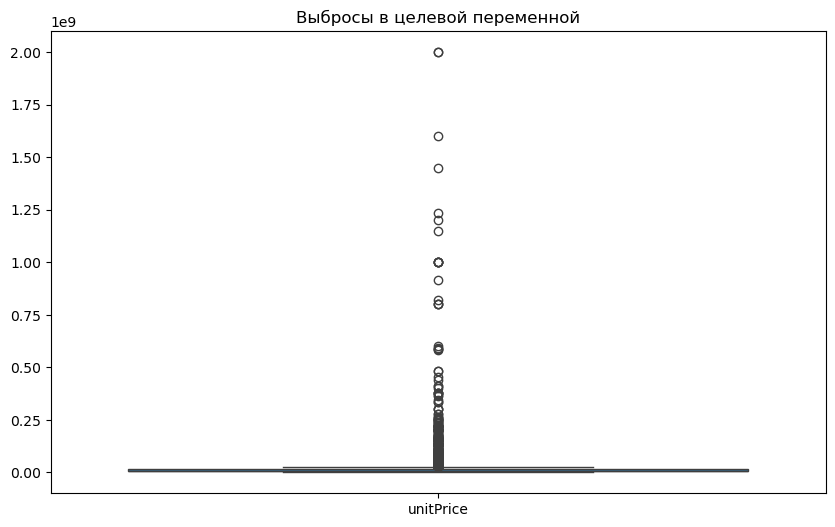

In [2689]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_new[['unitPrice']])  # Подставь нужный столбец
plt.title('Выбросы в целевой переменной')
plt.show()


In [2690]:
Q1 = df_new['unitPrice'].quantile(0.25)  
Q3 = df_new['unitPrice'].quantile(0.75)  
df_new = df_new[(df_new['unitPrice'] >= Q1) & (df_new['unitPrice'] <= Q3)]

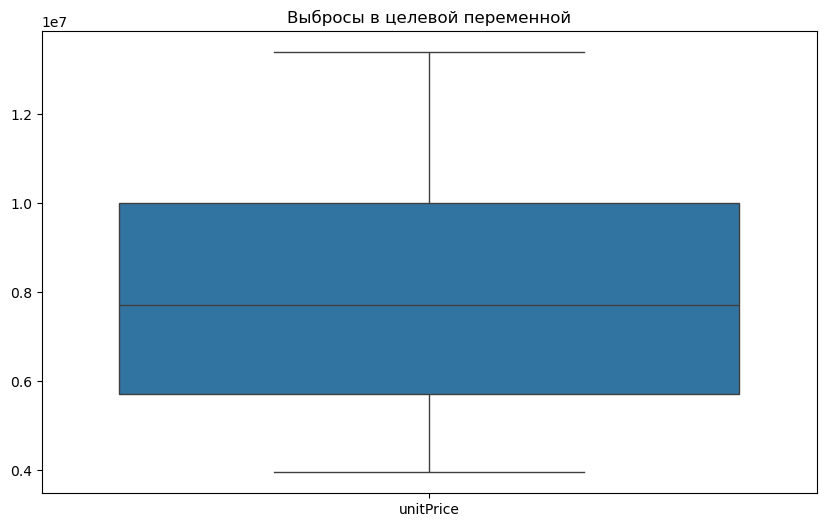

In [2691]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_new[['unitPrice']])  # Подставь нужный столбец
plt.title('Выбросы в целевой переменной')
plt.show()


In [2692]:
df_new.describe()

,isNewAuto,unitPrice,parameters_Коробка передач,parameters_Привод,parameters_Руль,parameters_Растаможен в Казахстане,year,mileage,Car_encoded,Body_encoded,engine_volume,fuel_type
count,6165.000000,6.165000e+03,6165.0,6165.000000,6165.000000,6165.000000,6165.0,6.165000e+03,6165.000000,6165.000000,6165.000000,6165.000000
mean,0.051095,8.009284e+06,1.042498,0.916626,0.504785,0.509165,2014.358313,1.490297e+05,660.645742,8.594972,2.347364,0.125061
std,0.220209,2.631750e+06,0.451917,0.405420,0.500018,0.499957,7.357664,9.671265e+04,325.061153,3.322139,0.686841,0.637690
min,0.000000,3.950000e+06,0.0,0.000000,0.000000,0.000000,1962.0,0.000000e+00,2.000000,0.000000,1.000000,0.000000
25%,0.000000,5.700000e+06,1.0,1.000000,0.000000,0.000000,2009.0,7.245131e+04,397.000000,10.000000,2.000000,0.000000
50%,0.000000,7.700000e+06,1.0,1.000000,1.000000,1.000000,2015.0,1.540000e+05,603.000000,10.000000,2.500000,0.000000
75%,0.000000,1.000000e+07,1.0,1.000000,1.000000,1.000000,2021.0,2.183535e+05,991.000000,10.000000,2.500000,0.000000
max,1.000000,1.339000e+07,3.0,2.000000,1.000000,1.000000,2025.0,1.250665e+06,1186.000000,15.000000,6.000000,5.000000


In [2693]:
df_new.to_csv('clean_dataset.csv')

In [2694]:
# df_new = pd.get_dummies(df_new, columns=['attributes_model', 'attributes_brand', 'parameters_Кузов'], dtype=int)
df_new.drop(columns=['attributes_model','attributes_brand'], axis=1, inplace=True)

In [2695]:
y = df_new['unitPrice']  
X = df_new.drop(columns=['unitPrice'])  

In [2696]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2697]:
df_new.head()

,isNewAuto,unitPrice,parameters_Коробка передач,parameters_Привод,parameters_Руль,parameters_Растаможен в Казахстане,year,mileage,Car_encoded,Body_encoded,engine_volume,fuel_type
0,0,8500000.0,1,2,1,1,2008,229052.941176,769,10,5.5,0
2,0,5050000.0,1,1,1,1,2022,74564.000000,206,15,1.0,0
8,0,7300000.0,1,1,1,1,2004,230000.000000,980,7,2.5,0
12,1,8790000.0,1,1,1,1,2024,0.000000,1163,12,2.0,0
20,0,11340000.0,2,1,1,1,2016,224180.000000,1047,2,2.0,0


In [2837]:
df_new.columns

Index(['isNewAuto', 'unitPrice', 'parameters_Коробка передач',
       'parameters_Привод', 'parameters_Руль',
       'parameters_Растаможен в Казахстане', 'year', 'mileage', 'Car_encoded',
       'Body_encoded', 'engine_volume', 'fuel_type'],
      dtype='object')

In [2698]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [2699]:
y_pred = model.predict(X_test)

In [2700]:
print(f'MAE: {mean_absolute_error(y_test, y_pred):.2f}')
print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')
print(f'R²: {r2_score(y_test, y_pred):.2f}')

MAE: 1803825.16
MSE: 4900253894238.16
RMSE: 2213651.71
R²: 0.30


In [2701]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")


MAPE: 24.65%


In [2702]:
df_new.columns

Index(['isNewAuto', 'unitPrice', 'parameters_Коробка передач',
       'parameters_Привод', 'parameters_Руль',
       'parameters_Растаможен в Казахстане', 'year', 'mileage', 'Car_encoded',
       'Body_encoded', 'engine_volume', 'fuel_type'],
      dtype='object')

In [2703]:
import pickle

# Сохранение модели
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# Сохранение LabelEncoder
with open("encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

print("Модель и LabelEncoder сохранены!")


Модель и LabelEncoder сохранены!


In [2704]:
#Седан           8927
# Кроссовер       1370
# Внедорожник      780
# Хэтчбек          348
# Минивэн          268
# Универсал        252
# Лифтбек          132
# Пикап            128
# Фургон            54
# Купе              34
# Микроавтобус      17
# Микровэн           2
# Кабриолет          2
# Родстер            2
# Тарга              1
# Фастбек            1

In [2705]:
label_mapping_body = pd.DataFrame({
    "Car_encoded": range(len(encoder.classes_)),  # Индексы
    "Original_name": encoder.classes_  # Исходные названия
})

print(label_mapping_body)  # Таблица соответстви

    Car_encoded Original_name
0             0   Внедорожник
1             1     Кабриолет
2             2     Кроссовер
3             3          Купе
4             4       Лифтбек
5             5  Микроавтобус
6             6      Микровэн
7             7       Минивэн
8             8         Пикап
9             9       Родстер
10           10         Седан
11           11         Тарга
12           12     Универсал
13           13       Фастбек
14           14        Фургон
15           15       Хэтчбек


In [2706]:
label_mapping_name = pd.DataFrame({
    "Car_encoded": range(len(encodera.classes_)),  
    "Original_name": encodera.classes_  
})

print(label_mapping_name)  

      Car_encoded   Original_name
0               0         AITO M5
1               1         AITO M9
2               2       Acura RSX
3               3  Alfa Romeo 159
4               4        Audi 100
...           ...             ...
1183         1183      УАЗ Hunter
1184         1184     УАЗ Patriot
1185         1185      УАЗ Pickup
1186         1186     УАЗ Буханка
1187         1187      УАЗ Фермер

[1188 rows x 2 columns]


In [2839]:
label_mapping_name[label_mapping_name['Original_name'] == 'Toyota Camry']

,Car_encoded,Original_name
991,991,Toyota Camry
